In [1]:
import pandas as pd
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#goal: train correlation, and different trait_map settings, determine best model. then train model for all traits for mean and 95 perc

In [74]:
sim_cors.drop(columns=["trait"]).shape[1]

48

In [58]:
len(genmap_posdiff)

974

In [49]:
genmap_posdiff = pd.read_csv("data/sim_data/genmap_posdiff.csv")

In [52]:
genmap_posdiff["pos_diff"].mean()/1000000

2.0507755359342914

In [53]:
geno_sumstats = pd.read_csv("stats/summary_stats/sum_results.csv")

In [56]:
geno_sumstats

,rec_param,recomb_mean,recomb_num,het_sig,mean_sd_phi,geno_sig,mean_sd_cramersV,ks_sig,mean_sd_w1d,ld_ks_sig,mean_sd_ld_w1d,gc_sig,mean_sd_gc,rogers_sig,rogers_cohens
0,normal_rec,31.209948,127.284140,14/25,"median: 0.01, IQR: 0.01, mean: 0.0068 ± 0.00557",25/25,"median: 0.13, IQR: 0.01, mean: 0.126 ± 0.00866",3/25,"median: 30.14, IQR: 22.7, mean: 34.1 ± 16.7",24/25,"median: 0.02, IQR: 0.01, mean: 0.018 ± 0.01",25/25,"median: 1.28, IQR: 0.25, mean: 1.28 ± 0.194",21/25,"median: -0.02, IQR: 0.15, mean: -0.006 ± 0.095"
1,high_rec,4.388363,908.576914,10/25,"median: 0, IQR: 0.01, mean: 0.004 ± 0.005",25/25,"median: 0.13, IQR: 0.01, mean: 0.125 ± 0.00823",1/25,"median: 23.1, IQR: 11.67, mean: 26.9 ± 11.5",23/25,"median: 0.02, IQR: 0.02, mean: 0.0208 ± 0.0126",25/25,"median: 1.32, IQR: 0.3, mean: 1.33 ± 0.198",15/25,"median: 0.01, IQR: 0.09, mean: -4e-04 ± 0.068"
2,zero_rec,4.388363,908.576914,13/25,"median: 0.01, IQR: 0.01, mean: 0.0064 ± 0.00638",25/25,"median: 0.13, IQR: 0.01, mean: 0.126 ± 0.0087",3/25,"median: 28.38, IQR: 23.17, mean: 33.1 ± 15.8",23/25,"median: 0.02, IQR: 0.02, mean: 0.0196 ± 0.0102",25/25,"median: 1.32, IQR: 0.32, mean: 1.31 ± 0.195",18/25,"median: 0.01, IQR: 0.15, mean: 0.0088 ± 0.101"
3,mean_rec,4.388363,908.576914,16/25,"median: 0.01, IQR: 0.01, mean: 0.0076 ± 0.00597",25/25,"median: 0.13, IQR: 0.01, mean: 0.126 ± 0.00917",4/25,"median: 26.89, IQR: 23.47, mean: 32.7 ± 17.2",23/25,"median: 0.02, IQR: 0.02, mean: 0.0196 ± 0.0102",25/25,"median: 1.28, IQR: 0.25, mean: 1.3 ± 0.18",19/25,"median: -0.01, IQR: 0.14, mean: 0.0064 ± 0.112"


In [62]:
my_list = ['apple', 'orange', 'banana']

# Concatenate list elements with '_' separator
result_string = '_'.join(my_list)
result_string

'apple_orange_banana'

In [67]:
# Initialize an empty list of lists
list_of_lists = list()

# List to append
new_list1 = [1, 2, 3]
new_list2 = [4, 5, 6]

# Append the new lists to the list of lists
list_of_lists.append(new_list1)
list_of_lists.append(new_list2)

# Iterate over the list of lists
for sublist in list_of_lists:
    print(sublist[0])

1
4


In [55]:
geno_sumstats[geno_sumstats["rec_param"] == "normal_rec"]["recomb_mean"]

0    31.209948
Name: recomb_mean, dtype: float64

In [68]:
#load train and test data (marker traits/correlations on sim and real populations)
real_cors = pd.read_csv("stats/pheno_prediction/real_cors.csv")
sim_cors = pd.read_csv("stats/pheno_prediction/sim_cors.csv")

real_parent_trait = pd.read_csv("stats/pheno_prediction/real_parent_trait_map.csv")
sim_parent_trait = pd.read_csv("stats/pheno_prediction/sim_parent_trait_map.csv")

real_phenos = pd.read_csv("stats/pheno_prediction/real_summary.csv")
sim_phenos = pd.read_csv("stats/pheno_prediction/sim_summary.csv")

#load genmap for marker data
genmap = pd.read_csv("data/sim_data/B73_genmap.csv")

In [69]:
real_cors

,1:20,21:40,41:60,61:80,81:100,101:120,121:140,141:160,161:180,181:200,...,781:800,801:820,821:840,841:860,861:880,881:900,901:920,921:940,941:960,trait
0,0.144726,-0.164808,0.091737,0.185222,-0.853048,0.062753,0.121915,-0.541104,-0.460131,-0.935532,...,-0.548719,-0.962393,-0.570359,-0.642963,-0.116922,-0.888807,-0.437843,-0.516330,0.191540,silk
1,-0.210963,0.143112,-0.700251,-0.285194,-0.232475,-0.233089,-0.646117,-0.822982,-0.720507,-0.864126,...,-0.701653,-0.416673,-0.445668,-0.163073,0.521947,-0.220580,-0.091639,-0.905986,-0.184654,silk
2,-0.714292,-0.055186,-0.368663,0.172223,-0.222728,0.235433,-0.514971,-0.600420,-0.667921,-0.461590,...,-0.774368,-0.215768,-0.234976,-0.146251,0.587873,-0.676967,-0.232431,-0.848893,-0.297085,silk
3,-0.129157,0.143291,-0.242155,-0.379001,-0.225578,-0.189180,-0.138988,0.281425,-0.966506,-0.649935,...,-0.734494,-0.095528,0.509755,-0.293299,0.421950,-0.048821,-0.455600,-0.190008,0.164768,silk
4,-0.362373,0.015227,-0.031387,-0.588553,-0.742830,0.337100,0.548250,-0.078079,-0.879462,-0.438446,...,-0.374203,0.215844,-0.143826,-0.711239,0.045995,-0.913514,-0.186392,-0.553265,0.035708,silk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,-0.599072,-0.358886,-0.583362,-0.439205,0.073889,-0.308729,-0.566233,-0.843658,0.104666,-0.407961,...,0.353112,-0.250604,-0.882265,-0.388924,-0.289299,-0.819023,0.577708,0.032676,0.525328,starch
121,0.402400,-0.222821,-0.337580,0.246272,-0.247564,-0.154125,0.093254,0.424470,0.005757,-0.341527,...,-0.673428,-0.265297,-0.114028,0.073523,-0.563237,-0.258468,-0.423570,-0.744105,0.361746,starch
122,-0.366759,-0.597951,-0.828967,-0.748795,-0.834938,-0.220478,0.404462,-0.409697,-0.272146,-0.124083,...,-0.729700,-0.869837,-0.317505,-0.619692,-0.100140,-0.131245,-0.250181,-0.825838,-0.772780,starch
123,-0.541997,-0.924495,-0.554619,0.031945,-0.564275,-0.493941,-0.218473,-0.605571,-0.494189,0.324498,...,-0.660780,-0.044365,-0.648204,-0.227579,-0.710731,-0.844159,0.016575,-0.719973,0.376160,starch


In [29]:
features = list(["p1", "p2", "position", "cM", "rate", "pos_diff"])

In [30]:
real_x = real_parent_trait[real_parent_trait["trait"].isin(["silk"])]


In [37]:
real_x_drop = real_x.drop(columns=["trait","feature"])

In [19]:
int(len(real_x)/len(features))

50

In [41]:
real_x_arr = np.array(real_x_drop).reshape((int(len(real_x_drop)/len(features)), len(features), len(genmap), 1))

In [63]:
round(5.6123,3)

5.612

In [39]:
real_x.head(n=10)

,PZA01271.1,PZA03613.1,PZA02129.1,PZA02032.1,PHM2244.142,PZA02372.1,PHM6238.36,PZA00181.2,PZA00528.1,PZA00175.2,...,PZA02969.9,PZA02049.1,PZA00007.1,PHM5435.25,PZA01073.1,PZA01001.2,PZA02578.1,PZA00062.4,feature,trait
0,1.043260e-04,9.158334e-03,-1.319459e-02,-1.183499e-02,-1.190903e-02,1.131943e-02,7.503596e-05,8.261730e-03,1.601092e-02,-1.724645e-02,...,-1.787819e-02,-4.475236e-03,-3.716614e-02,2.019912e-03,-1.447664e-02,1.081921e-02,4.814114e-03,2.305017e-02,p1,silk
1,-1.043260e-04,-9.158334e-03,1.319459e-02,1.183499e-02,1.190903e-02,1.131943e-02,7.503596e-05,-8.261730e-03,-1.601092e-02,-1.724645e-02,...,1.787819e-02,4.475236e-03,3.716614e-02,-2.019912e-03,1.447664e-02,-1.081921e-02,-4.814114e-03,-2.305017e-02,p2,silk
2,1.947984e+06,2.914171e+06,3.706018e+06,4.490461e+06,5.562502e+06,6.220547e+06,7.156367e+06,8.366411e+06,8.367944e+06,8.510027e+06,...,1.436763e+08,1.440256e+08,1.441723e+08,1.442395e+08,1.445500e+08,1.465389e+08,1.465540e+08,1.469997e+08,position,silk
3,9.314967e-01,3.536037e+00,1.784706e+00,4.290881e+00,2.735375e+00,2.030305e+00,1.818116e+00,0.000000e+00,4.222884e+00,2.334730e+00,...,8.588188e-01,3.407341e+00,1.488583e+00,3.220602e+00,3.921778e+00,1.326788e+01,5.608550e+00,4.210642e-01,rate,silk
4,0.000000e+00,9.000000e-01,3.700000e+00,5.100000e+00,9.700000e+00,1.150000e+01,1.340000e+01,1.560000e+01,1.560000e+01,1.620000e+01,...,8.130000e+01,8.160000e+01,8.210000e+01,8.220000e+01,8.320000e+01,9.100000e+01,9.120000e+01,9.370000e+01,cM,silk
5,9.661870e+05,7.918470e+05,7.844430e+05,1.072041e+06,6.580450e+05,9.358200e+05,1.210044e+06,1.533000e+03,1.420830e+05,5.139780e+05,...,3.493170e+05,1.467420e+05,6.717800e+04,3.105010e+05,1.988894e+06,1.507400e+04,4.457480e+05,0.000000e+00,pos_diff,silk
6,1.043260e-04,9.158334e-03,-1.319459e-02,-1.183499e-02,-1.190903e-02,1.131943e-02,7.503596e-05,8.261730e-03,1.601092e-02,-1.724645e-02,...,-1.787819e-02,-4.475236e-03,-3.716614e-02,2.019912e-03,-1.447664e-02,1.081921e-02,4.814114e-03,2.305017e-02,p1,silk
7,1.043260e-04,-9.158334e-03,-1.319459e-02,1.183499e-02,1.190903e-02,-1.131943e-02,-7.503596e-05,-8.261730e-03,-1.601092e-02,-1.724645e-02,...,1.787819e-02,-4.475236e-03,-3.716614e-02,-2.019912e-03,1.447664e-02,1.081921e-02,-4.814114e-03,-2.305017e-02,p2,silk
8,1.947984e+06,2.914171e+06,3.706018e+06,4.490461e+06,5.562502e+06,6.220547e+06,7.156367e+06,8.366411e+06,8.367944e+06,8.510027e+06,...,1.436763e+08,1.440256e+08,1.441723e+08,1.442395e+08,1.445500e+08,1.465389e+08,1.465540e+08,1.469997e+08,position,silk
9,9.314967e-01,3.536037e+00,1.784706e+00,4.290881e+00,2.735375e+00,2.030305e+00,1.818116e+00,0.000000e+00,4.222884e+00,2.334730e+00,...,8.588188e-01,3.407341e+00,1.488583e+00,3.220602e+00,3.921778e+00,1.326788e+01,5.608550e+00,4.210642e-01,rate,silk


In [42]:
real_x_arr

array([[[[ 1.04326026e-04],
         [ 9.15833425e-03],
         [-1.31945902e-02],
         ...,
         [ 1.08192148e-02],
         [ 4.81411402e-03],
         [ 2.30501726e-02]],

        [[-1.04326026e-04],
         [-9.15833425e-03],
         [ 1.31945902e-02],
         ...,
         [-1.08192148e-02],
         [-4.81411402e-03],
         [-2.30501726e-02]],

        [[ 1.94798400e+06],
         [ 2.91417100e+06],
         [ 3.70601800e+06],
         ...,
         [ 1.46538889e+08],
         [ 1.46553963e+08],
         [ 1.46999711e+08]],

        [[ 9.31496698e-01],
         [ 3.53603663e+00],
         [ 1.78470584e+00],
         ...,
         [ 1.32678785e+01],
         [ 5.60855012e+00],
         [ 4.21064155e-01]],

        [[ 0.00000000e+00],
         [ 9.00000000e-01],
         [ 3.70000000e+00],
         ...,
         [ 9.10000000e+01],
         [ 9.12000000e+01],
         [ 9.37000000e+01]],

        [[ 9.66187000e+05],
         [ 7.91847000e+05],
         [ 7.84443000e+0

In [15]:
real_cors

,1:20,21:40,41:60,61:80,81:100,101:120,121:140,141:160,161:180,181:200,...,781:800,801:820,821:840,841:860,861:880,881:900,901:920,921:940,941:960,trait
0,0.144726,-0.164808,0.091737,0.185222,-0.853048,0.062753,0.121915,-0.541104,-0.460131,-0.935532,...,-0.548719,-0.962393,-0.570359,-0.642963,-0.116922,-0.888807,-0.437843,-0.516330,0.191540,silk
1,-0.210963,0.143112,-0.700251,-0.285194,-0.232475,-0.233089,-0.646117,-0.822982,-0.720507,-0.864126,...,-0.701653,-0.416673,-0.445668,-0.163073,0.521947,-0.220580,-0.091639,-0.905986,-0.184654,silk
2,-0.714292,-0.055186,-0.368663,0.172223,-0.222728,0.235433,-0.514971,-0.600420,-0.667921,-0.461590,...,-0.774368,-0.215768,-0.234976,-0.146251,0.587873,-0.676967,-0.232431,-0.848893,-0.297085,silk
3,-0.129157,0.143291,-0.242155,-0.379001,-0.225578,-0.189180,-0.138988,0.281425,-0.966506,-0.649935,...,-0.734494,-0.095528,0.509755,-0.293299,0.421950,-0.048821,-0.455600,-0.190008,0.164768,silk
4,-0.362373,0.015227,-0.031387,-0.588553,-0.742830,0.337100,0.548250,-0.078079,-0.879462,-0.438446,...,-0.374203,0.215844,-0.143826,-0.711239,0.045995,-0.913514,-0.186392,-0.553265,0.035708,silk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,-0.599072,-0.358886,-0.583362,-0.439205,0.073889,-0.308729,-0.566233,-0.843658,0.104666,-0.407961,...,0.353112,-0.250604,-0.882265,-0.388924,-0.289299,-0.819023,0.577708,0.032676,0.525328,starch
121,0.402400,-0.222821,-0.337580,0.246272,-0.247564,-0.154125,0.093254,0.424470,0.005757,-0.341527,...,-0.673428,-0.265297,-0.114028,0.073523,-0.563237,-0.258468,-0.423570,-0.744105,0.361746,starch
122,-0.366759,-0.597951,-0.828967,-0.748795,-0.834938,-0.220478,0.404462,-0.409697,-0.272146,-0.124083,...,-0.729700,-0.869837,-0.317505,-0.619692,-0.100140,-0.131245,-0.250181,-0.825838,-0.772780,starch
123,-0.541997,-0.924495,-0.554619,0.031945,-0.564275,-0.493941,-0.218473,-0.605571,-0.494189,0.324498,...,-0.660780,-0.044365,-0.648204,-0.227579,-0.710731,-0.844159,0.016575,-0.719973,0.376160,starch


In [4]:
len(genmap)

974

In [3]:
real_parent_trait

,PZA01271.1,PZA03613.1,PZA02129.1,PZA02032.1,PHM2244.142,PZA02372.1,PHM6238.36,PZA00181.2,PZA00528.1,PZA00175.2,...,PZA02969.9,PZA02049.1,PZA00007.1,PHM5435.25,PZA01073.1,PZA01001.2,PZA02578.1,PZA00062.4,feature,trait
0,1.043260e-04,9.158334e-03,-1.319459e-02,-1.183499e-02,-1.190903e-02,1.131943e-02,7.503596e-05,8.261730e-03,1.601092e-02,-1.724645e-02,...,-1.787819e-02,-4.475236e-03,-3.716614e-02,2.019912e-03,-1.447664e-02,1.081921e-02,4.814114e-03,2.305017e-02,p1,silk
1,-1.043260e-04,-9.158334e-03,1.319459e-02,1.183499e-02,1.190903e-02,1.131943e-02,7.503596e-05,-8.261730e-03,-1.601092e-02,-1.724645e-02,...,1.787819e-02,4.475236e-03,3.716614e-02,-2.019912e-03,1.447664e-02,-1.081921e-02,-4.814114e-03,-2.305017e-02,p2,silk
2,1.947984e+06,2.914171e+06,3.706018e+06,4.490461e+06,5.562502e+06,6.220547e+06,7.156367e+06,8.366411e+06,8.367944e+06,8.510027e+06,...,1.436763e+08,1.440256e+08,1.441723e+08,1.442395e+08,1.445500e+08,1.465389e+08,1.465540e+08,1.469997e+08,position,silk
3,9.314967e-01,3.536037e+00,1.784706e+00,4.290881e+00,2.735375e+00,2.030305e+00,1.818116e+00,0.000000e+00,4.222884e+00,2.334730e+00,...,8.588188e-01,3.407341e+00,1.488583e+00,3.220602e+00,3.921778e+00,1.326788e+01,5.608550e+00,4.210642e-01,rate,silk
4,0.000000e+00,9.000000e-01,3.700000e+00,5.100000e+00,9.700000e+00,1.150000e+01,1.340000e+01,1.560000e+01,1.560000e+01,1.620000e+01,...,8.130000e+01,8.160000e+01,8.210000e+01,8.220000e+01,8.320000e+01,9.100000e+01,9.120000e+01,9.370000e+01,cM,silk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-3.135908e-04,-3.435014e-03,-8.821718e-03,-2.333071e-02,1.314998e-02,1.489029e-02,1.361559e-02,7.782184e-03,5.193336e-03,5.193076e-03,...,-1.869611e-03,-9.125630e-03,2.903283e-03,-6.131543e-03,-1.517157e-02,-2.983419e-03,-5.017919e-04,-1.674873e-03,p2,starch
746,1.947984e+06,2.914171e+06,3.706018e+06,4.490461e+06,5.562502e+06,6.220547e+06,7.156367e+06,8.366411e+06,8.367944e+06,8.510027e+06,...,1.436763e+08,1.440256e+08,1.441723e+08,1.442395e+08,1.445500e+08,1.465389e+08,1.465540e+08,1.469997e+08,position,starch
747,9.314967e-01,3.536037e+00,1.784706e+00,4.290881e+00,2.735375e+00,2.030305e+00,1.818116e+00,0.000000e+00,4.222884e+00,2.334730e+00,...,8.588188e-01,3.407341e+00,1.488583e+00,3.220602e+00,3.921778e+00,1.326788e+01,5.608550e+00,4.210642e-01,rate,starch
748,0.000000e+00,9.000000e-01,3.700000e+00,5.100000e+00,9.700000e+00,1.150000e+01,1.340000e+01,1.560000e+01,1.560000e+01,1.620000e+01,...,8.130000e+01,8.160000e+01,8.210000e+01,8.220000e+01,8.320000e+01,9.100000e+01,9.120000e+01,9.370000e+01,cM,starch


In [6]:
real_x = real_parent_trait[real_parent_trait["trait"].isin(["silk"])].drop(columns=["feature", "trait"])

In [8]:
real_parent_trait

,PZA01271.1,PZA03613.1,PZA02129.1,PZA02032.1,PHM2244.142,PZA02372.1,PHM6238.36,PZA00181.2,PZA00528.1,PZA00175.2,...,PZA02969.9,PZA02049.1,PZA00007.1,PHM5435.25,PZA01073.1,PZA01001.2,PZA02578.1,PZA00062.4,feature,trait
0,1.043260e-04,9.158334e-03,-1.319459e-02,-1.183499e-02,-1.190903e-02,1.131943e-02,7.503596e-05,8.261730e-03,1.601092e-02,-1.724645e-02,...,-1.787819e-02,-4.475236e-03,-3.716614e-02,2.019912e-03,-1.447664e-02,1.081921e-02,4.814114e-03,2.305017e-02,p1,silk
1,-1.043260e-04,-9.158334e-03,1.319459e-02,1.183499e-02,1.190903e-02,1.131943e-02,7.503596e-05,-8.261730e-03,-1.601092e-02,-1.724645e-02,...,1.787819e-02,4.475236e-03,3.716614e-02,-2.019912e-03,1.447664e-02,-1.081921e-02,-4.814114e-03,-2.305017e-02,p2,silk
2,1.947984e+06,2.914171e+06,3.706018e+06,4.490461e+06,5.562502e+06,6.220547e+06,7.156367e+06,8.366411e+06,8.367944e+06,8.510027e+06,...,1.436763e+08,1.440256e+08,1.441723e+08,1.442395e+08,1.445500e+08,1.465389e+08,1.465540e+08,1.469997e+08,position,silk
3,9.314967e-01,3.536037e+00,1.784706e+00,4.290881e+00,2.735375e+00,2.030305e+00,1.818116e+00,0.000000e+00,4.222884e+00,2.334730e+00,...,8.588188e-01,3.407341e+00,1.488583e+00,3.220602e+00,3.921778e+00,1.326788e+01,5.608550e+00,4.210642e-01,rate,silk
4,0.000000e+00,9.000000e-01,3.700000e+00,5.100000e+00,9.700000e+00,1.150000e+01,1.340000e+01,1.560000e+01,1.560000e+01,1.620000e+01,...,8.130000e+01,8.160000e+01,8.210000e+01,8.220000e+01,8.320000e+01,9.100000e+01,9.120000e+01,9.370000e+01,cM,silk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-3.135908e-04,-3.435014e-03,-8.821718e-03,-2.333071e-02,1.314998e-02,1.489029e-02,1.361559e-02,7.782184e-03,5.193336e-03,5.193076e-03,...,-1.869611e-03,-9.125630e-03,2.903283e-03,-6.131543e-03,-1.517157e-02,-2.983419e-03,-5.017919e-04,-1.674873e-03,p2,starch
746,1.947984e+06,2.914171e+06,3.706018e+06,4.490461e+06,5.562502e+06,6.220547e+06,7.156367e+06,8.366411e+06,8.367944e+06,8.510027e+06,...,1.436763e+08,1.440256e+08,1.441723e+08,1.442395e+08,1.445500e+08,1.465389e+08,1.465540e+08,1.469997e+08,position,starch
747,9.314967e-01,3.536037e+00,1.784706e+00,4.290881e+00,2.735375e+00,2.030305e+00,1.818116e+00,0.000000e+00,4.222884e+00,2.334730e+00,...,8.588188e-01,3.407341e+00,1.488583e+00,3.220602e+00,3.921778e+00,1.326788e+01,5.608550e+00,4.210642e-01,rate,starch
748,0.000000e+00,9.000000e-01,3.700000e+00,5.100000e+00,9.700000e+00,1.150000e+01,1.340000e+01,1.560000e+01,1.560000e+01,1.620000e+01,...,8.130000e+01,8.160000e+01,8.210000e+01,8.220000e+01,8.320000e+01,9.100000e+01,9.120000e+01,9.370000e+01,cM,starch


In [18]:
features = list(["p1", "p2", "position"])

In [23]:
real_parent_trait[real_parent_trait["feature"].isin(features)].shape[0]/len(features)

125.0

In [6]:
real_phenos

,pop,trait,trait_mean,trait_max,trait_min,trait_var,trait_95_perc,parent_mean
0,1,silk,98.075349,99.704353,96.556792,0.468309,99.308093,98.614950
1,2,silk,98.970418,101.076220,96.863248,0.681848,100.380358,97.701930
2,3,silk,99.123811,101.148017,97.290768,0.632048,100.513340,97.516807
3,4,silk,100.646224,104.485339,98.300008,1.148828,102.376779,95.941370
4,5,silk,99.920417,101.947925,98.004082,0.715073,101.303617,96.615914
...,...,...,...,...,...,...,...,...
120,22,starch,67.973138,70.037020,64.881977,1.086375,69.701077,66.638279
121,23,starch,67.004855,69.830126,64.837362,1.023995,68.547252,67.532386
122,24,starch,67.963097,70.203088,64.099043,1.189080,69.556309,67.082722
123,25,starch,67.235955,71.258608,64.385682,1.358596,69.096670,67.300692


In [12]:
real_phenos[real_phenos["trait"].isin(["silk"])]

,pop,trait,trait_mean,trait_max,trait_min,trait_var,trait_95_perc,parent_mean
0,1,silk,98.075349,99.704353,96.556792,0.468309,99.308093,98.614950
1,2,silk,98.970418,101.076220,96.863248,0.681848,100.380358,97.701930
2,3,silk,99.123811,101.148017,97.290768,0.632048,100.513340,97.516807
3,4,silk,100.646224,104.485339,98.300008,1.148828,102.376779,95.941370
4,5,silk,99.920417,101.947925,98.004082,0.715073,101.303617,96.615914
5,6,silk,98.694535,100.350207,96.749747,0.599598,99.748838,98.163295
6,7,silk,99.559893,101.356453,97.574323,0.483500,100.697541,97.070353
7,8,silk,100.236401,102.857015,97.920905,0.864834,101.719991,96.446136
8,9,silk,99.373684,101.553095,97.413872,0.729136,100.758743,97.306600
9,10,silk,96.736983,98.335290,94.969532,0.518389,97.899792,99.764588


In [17]:
#reshape samples into CNN compatible structure (batchsize,kernel_x(trait_cor & recomb_avg),kernel_y(num_features),channels)
real_x = np.array(real_cor_avg).reshape((len(real_cors),1,48,1))
sim_x = np.array(sim_cor_avg).reshape((len(sim_cors),1,48,1))
real_y = real_phenos[real_phenos["trait"].isin(["silk"])]["trait_mean"]
sim_y = sim_phenos[sim_phenos["trait"].isin(["silk"])]["trait_mean"]

In [19]:
#train CNN model on parental correlations and genmap rate
kernel_x = 2
kernel_y = 48
model = models.Sequential()
#Convolute on (2, 5) window
model.add(layers.Conv2D(32, (2, 5), activation='relu', input_shape=(kernel_x, kernel_y, 1)))
model.add(layers.MaxPooling2D((1, 4)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

#compile model
model.compile(optimizer='adam', loss='mean_squared_error')

#print summary
model.summary()

#train model on simulated data
history = model.fit(sim_x, sim_y, epochs=500, batch_size=1)

#evaluate model on real data
loss = model.evaluate(real_x, real_y)
print("Test Loss:", loss)

#predict on real data
predictions = model.predict(real_x)

#compare predicted and true real values
for i in range(len(predictions)):
    print(f"Sample {i + 1}: Predicted={predictions[i][0]}, True={real_y[i]}")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 1, 44, 32)         352       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 1, 11, 32)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 352)               0         
                                                                 
 dense (Dense)               (None, 32)                11296     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11681 (45.63 KB)
Trainable params: 11681 (45.63 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

96/96 [==============================] - 0s 1ms/step - loss: 6.0777
Epoch 88/500
96/96 [==============================] - 0s 2ms/step - loss: 5.4843
Epoch 89/500
96/96 [==============================] - 0s 2ms/step - loss: 5.1555
Epoch 90/500
96/96 [==============================] - 0s 1ms/step - loss: 5.8203
Epoch 91/500
96/96 [==============================] - 0s 1ms/step - loss: 6.2847
Epoch 92/500
96/96 [==============================] - 0s 1ms/step - loss: 4.6936
Epoch 93/500
96/96 [==============================] - 0s 1ms/step - loss: 5.4472
Epoch 94/500
96/96 [==============================] - 0s 1ms/step - loss: 5.6953
Epoch 95/500
96/96 [==============================] - 0s 1ms/step - loss: 4.7706
Epoch 96/500
96/96 [==============================] - 0s 1ms/step - loss: 5.2450
Epoch 97/500
96/96 [==============================] - 0s 1ms/step - loss: 5.1763
Epoch 98/500
96/96 [==============================] - 0s 1ms/step - loss: 4.4734
Epoch 99/500
96/96 [=====================

96/96 [==============================] - 0s 1ms/step - loss: 0.8714
Epoch 188/500
96/96 [==============================] - 0s 1ms/step - loss: 1.5774
Epoch 189/500
96/96 [==============================] - 0s 1ms/step - loss: 1.2166
Epoch 190/500
96/96 [==============================] - 0s 1ms/step - loss: 1.4466
Epoch 191/500
96/96 [==============================] - 0s 1ms/step - loss: 0.8578
Epoch 192/500
96/96 [==============================] - 0s 1ms/step - loss: 0.5239
Epoch 193/500
96/96 [==============================] - 0s 1ms/step - loss: 0.6821
Epoch 194/500
96/96 [==============================] - 0s 2ms/step - loss: 0.9209
Epoch 195/500
96/96 [==============================] - 0s 1ms/step - loss: 0.6045
Epoch 196/500
96/96 [==============================] - 0s 1ms/step - loss: 0.6456
Epoch 197/500
96/96 [==============================] - 0s 1ms/step - loss: 0.6868
Epoch 198/500
96/96 [==============================] - 0s 1ms/step - loss: 0.6772
Epoch 199/500
96/96 [=========

96/96 [==============================] - 0s 1ms/step - loss: 0.1207
Epoch 288/500
96/96 [==============================] - 0s 1ms/step - loss: 0.0978
Epoch 289/500
96/96 [==============================] - 0s 2ms/step - loss: 0.1375
Epoch 290/500
96/96 [==============================] - 0s 1ms/step - loss: 0.1547
Epoch 291/500
96/96 [==============================] - 0s 1ms/step - loss: 0.0742
Epoch 292/500
96/96 [==============================] - 0s 1ms/step - loss: 0.0728
Epoch 293/500
96/96 [==============================] - 0s 1ms/step - loss: 0.1048
Epoch 294/500
96/96 [==============================] - 0s 1ms/step - loss: 0.2262
Epoch 295/500
96/96 [==============================] - 0s 1ms/step - loss: 0.4347
Epoch 296/500
96/96 [==============================] - 0s 1ms/step - loss: 0.5431
Epoch 297/500
96/96 [==============================] - 0s 1ms/step - loss: 0.4660
Epoch 298/500
96/96 [==============================] - 0s 1ms/step - loss: 0.2812
Epoch 299/500
96/96 [=========

96/96 [==============================] - 0s 1ms/step - loss: 0.2719
Epoch 388/500
96/96 [==============================] - 0s 1ms/step - loss: 0.1629
Epoch 389/500
96/96 [==============================] - 0s 1ms/step - loss: 0.1711
Epoch 390/500
96/96 [==============================] - 0s 1ms/step - loss: 0.2446
Epoch 391/500
96/96 [==============================] - 0s 1ms/step - loss: 0.2628
Epoch 392/500
96/96 [==============================] - 0s 1ms/step - loss: 0.1905
Epoch 393/500
96/96 [==============================] - 0s 1ms/step - loss: 0.1838
Epoch 394/500
96/96 [==============================] - 0s 1ms/step - loss: 0.1876
Epoch 395/500
96/96 [==============================] - 0s 1ms/step - loss: 0.1724
Epoch 396/500
96/96 [==============================] - 0s 1ms/step - loss: 0.1277
Epoch 397/500
96/96 [==============================] - 0s 1ms/step - loss: 0.2029
Epoch 398/500
96/96 [==============================] - 0s 1ms/step - loss: 0.1924
Epoch 399/500
96/96 [=========

96/96 [==============================] - 0s 1ms/step - loss: 0.0492
Epoch 488/500
96/96 [==============================] - 0s 1ms/step - loss: 0.0479
Epoch 489/500
96/96 [==============================] - 0s 1ms/step - loss: 0.1392
Epoch 490/500
96/96 [==============================] - 0s 1ms/step - loss: 0.4493
Epoch 491/500
96/96 [==============================] - 0s 1ms/step - loss: 0.4412
Epoch 492/500
96/96 [==============================] - 0s 1ms/step - loss: 0.3850
Epoch 493/500
96/96 [==============================] - 0s 1ms/step - loss: 0.2774
Epoch 494/500
96/96 [==============================] - 0s 1ms/step - loss: 0.2141
Epoch 495/500
96/96 [==============================] - 0s 1ms/step - loss: 0.1585
Epoch 496/500
96/96 [==============================] - 0s 1ms/step - loss: 0.1442
Epoch 497/500
96/96 [==============================] - 0s 1ms/step - loss: 0.2040
Epoch 498/500
96/96 [==============================] - 0s 1ms/step - loss: 0.2289
Epoch 499/500
96/96 [=========

In [5]:
np.sqrt(loss)

15.910305383078368

In [6]:
model.layers

In [57]:
genmap

,Marker,Chromosome,Position(bp),Rate(cM/Mb),Map(cM)
0,PZA01271.1,1,1947984,0.931497,0.0
1,PZA03613.1,1,2914171,3.536037,0.9
2,PZA02129.1,1,3706018,1.784706,3.7
3,PZA02032.1,1,4490461,4.290881,5.1
4,PHM2244.142,1,5562502,2.735375,9.7
...,...,...,...,...,...
969,PHM5435.25,10,144239494,3.220602,82.2
970,PZA01073.1,10,144549995,3.921778,83.2
971,PZA01001.2,10,146538889,13.267878,91.0
972,PZA02578.1,10,146553963,5.608550,91.2


In [55]:
real_parent_trait

,PZA01271.1,PZA03613.1,PZA02129.1,PZA02032.1,PHM2244.142,PZA02372.1,PHM6238.36,PZA00181.2,PZA00528.1,PZA00175.2,...,PZA03604.1,PZA00130.9,PZA02969.9,PZA02049.1,PZA00007.1,PHM5435.25,PZA01073.1,PZA01001.2,PZA02578.1,PZA00062.4
0,0.030777,0.036167,-0.055993,-0.131680,0.024888,0.030791,-0.053735,0.050903,0.088392,0.120965,...,-0.045422,-0.156327,-0.065606,-0.037002,-0.184415,0.030437,0.019492,-0.049043,-0.083028,0.073480
1,-0.030777,-0.036167,0.055993,0.131680,-0.024888,0.030791,-0.053735,-0.050903,-0.088392,0.120965,...,0.045422,-0.156327,0.065606,0.037002,0.184415,-0.030437,-0.019492,0.049043,0.083028,-0.073480
2,0.931497,3.536037,1.784706,4.290881,2.735375,2.030305,1.818116,0.000000,4.222884,2.334730,...,3.756031,1.229099,0.858819,3.407341,1.488583,3.220602,3.921778,13.267878,5.608550,0.421064
3,0.030777,0.036167,-0.055993,-0.131680,0.024888,0.030791,-0.053735,0.050903,0.088392,0.120965,...,-0.045422,-0.156327,-0.065606,-0.037002,-0.184415,0.030437,0.019492,-0.049043,-0.083028,0.073480
4,0.030777,-0.036167,-0.055993,0.131680,-0.024888,-0.030791,0.053735,-0.050903,-0.088392,0.120965,...,0.045422,0.000000,0.065606,-0.037002,-0.184415,-0.030437,-0.019492,-0.049043,0.083028,-0.073480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,-0.030777,-0.036167,0.055993,0.131680,-0.024888,-0.030791,0.053735,-0.050903,-0.088392,-0.120965,...,0.045422,0.156327,-0.065606,-0.037002,-0.184415,0.030437,-0.019492,0.049043,0.083028,-0.073480
71,0.931497,3.536037,1.784706,4.290881,2.735375,2.030305,1.818116,0.000000,4.222884,2.334730,...,3.756031,1.229099,0.858819,3.407341,1.488583,3.220602,3.921778,13.267878,5.608550,0.421064
72,0.030777,0.036167,-0.055993,-0.131680,0.024888,0.030791,-0.053735,0.050903,0.088392,0.120965,...,-0.045422,-0.156327,-0.065606,-0.037002,-0.184415,0.030437,0.019492,-0.049043,-0.083028,0.073480
73,-0.030777,-0.036167,0.055993,0.131680,-0.024888,-0.030791,0.053735,-0.050903,-0.088392,-0.120965,...,0.045422,0.156327,-0.065606,-0.037002,-0.184415,0.030437,-0.019492,0.049043,0.083028,-0.073480


In [54]:
real_x

array([[[[ 0.03077703],
         [ 0.03616739],
         [-0.05599283],
         ...,
         [-0.04904252],
         [-0.08302831],
         [ 0.07348023]],

        [[-0.03077703],
         [-0.03616739],
         [ 0.05599283],
         ...,
         [ 0.04904252],
         [ 0.08302831],
         [-0.07348023]],

        [[ 0.9314967 ],
         [ 3.53603663],
         [ 1.78470584],
         ...,
         [13.26787847],
         [ 5.60855012],
         [ 0.42106416]]],


       [[[ 0.03077703],
         [ 0.03616739],
         [-0.05599283],
         ...,
         [-0.04904252],
         [-0.08302831],
         [ 0.07348023]],

        [[ 0.03077703],
         [-0.03616739],
         [-0.05599283],
         ...,
         [-0.04904252],
         [ 0.08302831],
         [-0.07348023]],

        [[ 0.9314967 ],
         [ 3.53603663],
         [ 1.78470584],
         ...,
         [13.26787847],
         [ 5.60855012],
         [ 0.42106416]]],


       [[[ 0.03077703],
         [ 0

In [56]:
#train CNN on parental traits and genmap rate
real_x = np.array(real_parent_trait).reshape(25,3,974,1)
sim_x = np.array(sim_parent_trait).reshape(96,3,974,1)
real_y = real_phenos["trait_95_perc"]
sim_y = sim_phenos["trait_95_perc"]
kernel_x = 3
kernel_y = 974
model = models.Sequential()
#Convolute on (3, 5) window
model.add(layers.Conv2D(32, (3, 5), activation='relu', input_shape=(kernel_x, kernel_y, 1)))
model.add(layers.MaxPooling2D((1, 4)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

#compile model
model.compile(optimizer='adam', loss='mean_squared_error')

#print summary
model.summary()

#train model on simulated data
history = model.fit(sim_x, sim_y, epochs=500, batch_size=1)

#evaluate model on real data
loss = model.evaluate(real_x, real_y)
print("Test Loss:", loss)

#predict on real data
predictions = model.predict(real_x)

#compare predicted and true real values
for i in range(len(predictions)):
    print(f"Sample {i + 1}: Predicted={predictions[i][0]}, True={real_y[i]}")

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 1, 970, 32)        512       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 242, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 7744)              0         
                                                                 
 dense_6 (Dense)             (None, 32)                247840    
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 248385 (970.25 KB)
Trainable params: 248385 (970.25 KB)
Non-trainable params: 0 (0.00 Byte)
______________

96/96 [==============================] - 0s 4ms/step - loss: 1.1897
Epoch 88/500
96/96 [==============================] - 0s 4ms/step - loss: 0.4665
Epoch 89/500
96/96 [==============================] - 0s 4ms/step - loss: 1.3316
Epoch 90/500
96/96 [==============================] - 0s 4ms/step - loss: 1.2540
Epoch 91/500
96/96 [==============================] - 0s 4ms/step - loss: 1.9297
Epoch 92/500
96/96 [==============================] - 0s 3ms/step - loss: 1.4572
Epoch 93/500
96/96 [==============================] - 0s 3ms/step - loss: 0.7955
Epoch 94/500
96/96 [==============================] - 0s 4ms/step - loss: 0.6134
Epoch 95/500
96/96 [==============================] - 0s 4ms/step - loss: 0.6113
Epoch 96/500
96/96 [==============================] - 0s 3ms/step - loss: 0.6374
Epoch 97/500
96/96 [==============================] - 0s 3ms/step - loss: 0.9134
Epoch 98/500
96/96 [==============================] - 0s 3ms/step - loss: 1.0413
Epoch 99/500
96/96 [=====================

96/96 [==============================] - 0s 3ms/step - loss: 0.1717
Epoch 188/500
96/96 [==============================] - 0s 3ms/step - loss: 0.1073
Epoch 189/500
96/96 [==============================] - 0s 4ms/step - loss: 0.1664
Epoch 190/500
96/96 [==============================] - 0s 3ms/step - loss: 0.2349
Epoch 191/500
96/96 [==============================] - 0s 3ms/step - loss: 0.0945
Epoch 192/500
96/96 [==============================] - 0s 3ms/step - loss: 0.1366
Epoch 193/500
96/96 [==============================] - 0s 5ms/step - loss: 0.1752
Epoch 194/500
96/96 [==============================] - 0s 4ms/step - loss: 0.5769
Epoch 195/500
96/96 [==============================] - 0s 3ms/step - loss: 1.1532
Epoch 196/500
96/96 [==============================] - 0s 3ms/step - loss: 0.8778
Epoch 197/500
96/96 [==============================] - 0s 4ms/step - loss: 0.6155
Epoch 198/500
96/96 [==============================] - 0s 4ms/step - loss: 0.4606
Epoch 199/500
96/96 [=========

96/96 [==============================] - 0s 4ms/step - loss: 0.2254
Epoch 288/500
96/96 [==============================] - 0s 3ms/step - loss: 0.0959
Epoch 289/500
96/96 [==============================] - 0s 3ms/step - loss: 0.2188
Epoch 290/500
96/96 [==============================] - 0s 3ms/step - loss: 0.2723
Epoch 291/500
96/96 [==============================] - 0s 4ms/step - loss: 0.2479
Epoch 292/500
96/96 [==============================] - 0s 3ms/step - loss: 0.7020
Epoch 293/500
96/96 [==============================] - 0s 3ms/step - loss: 0.7077
Epoch 294/500
96/96 [==============================] - 0s 3ms/step - loss: 0.2570
Epoch 295/500
96/96 [==============================] - 0s 4ms/step - loss: 0.1502
Epoch 296/500
96/96 [==============================] - 0s 4ms/step - loss: 0.0741
Epoch 297/500
96/96 [==============================] - 0s 3ms/step - loss: 0.1758
Epoch 298/500
96/96 [==============================] - 0s 3ms/step - loss: 0.4232
Epoch 299/500
96/96 [=========

96/96 [==============================] - 0s 4ms/step - loss: 0.2153
Epoch 388/500
96/96 [==============================] - 0s 4ms/step - loss: 0.3945
Epoch 389/500
96/96 [==============================] - 0s 4ms/step - loss: 0.3451
Epoch 390/500
96/96 [==============================] - 0s 3ms/step - loss: 0.2305
Epoch 391/500
96/96 [==============================] - 0s 4ms/step - loss: 0.3057
Epoch 392/500
96/96 [==============================] - 0s 3ms/step - loss: 0.3601
Epoch 393/500
96/96 [==============================] - 0s 3ms/step - loss: 0.8553
Epoch 394/500
96/96 [==============================] - 0s 3ms/step - loss: 0.4972
Epoch 395/500
96/96 [==============================] - 0s 4ms/step - loss: 0.3649
Epoch 396/500
96/96 [==============================] - 0s 4ms/step - loss: 0.3541
Epoch 397/500
96/96 [==============================] - 0s 3ms/step - loss: 0.3891
Epoch 398/500
96/96 [==============================] - 0s 3ms/step - loss: 0.3983
Epoch 399/500
96/96 [=========

96/96 [==============================] - 0s 3ms/step - loss: 0.4267
Epoch 488/500
96/96 [==============================] - 0s 4ms/step - loss: 0.4464
Epoch 489/500
96/96 [==============================] - 0s 3ms/step - loss: 1.0683
Epoch 490/500
96/96 [==============================] - 0s 3ms/step - loss: 0.6576
Epoch 491/500
96/96 [==============================] - 0s 3ms/step - loss: 0.2842
Epoch 492/500
96/96 [==============================] - 0s 5ms/step - loss: 0.1618
Epoch 493/500
96/96 [==============================] - 0s 5ms/step - loss: 0.1872
Epoch 494/500
96/96 [==============================] - 0s 4ms/step - loss: 0.1177
Epoch 495/500
96/96 [==============================] - 0s 3ms/step - loss: 0.0823
Epoch 496/500
96/96 [==============================] - 0s 4ms/step - loss: 0.1850
Epoch 497/500
96/96 [==============================] - 0s 3ms/step - loss: 0.2395
Epoch 498/500
96/96 [==============================] - 0s 3ms/step - loss: 0.1499
Epoch 499/500
96/96 [=========

In [58]:
np.sqrt(loss)

4.400848107530156

In [59]:
np.var(predictions)

16.407646

In [60]:
np.var(real_y)

25.66930332944771

In [61]:
val_df = pd.DataFrame({'predicted': np.concatenate(predictions), 'real': real_y})

# Sort the DataFrame by a specific column (e.g., 'Column1')
val_df.sort_values(by='real')


,predicted,real
22,89.579903,92.027004
10,89.543190,93.074535
17,90.737968,93.237987
9,92.457031,93.691881
20,92.072487,95.224838
13,93.606682,97.548818
0,94.497337,97.559207
15,94.346657,97.887829
19,96.232391,100.303780
5,97.374336,100.651954


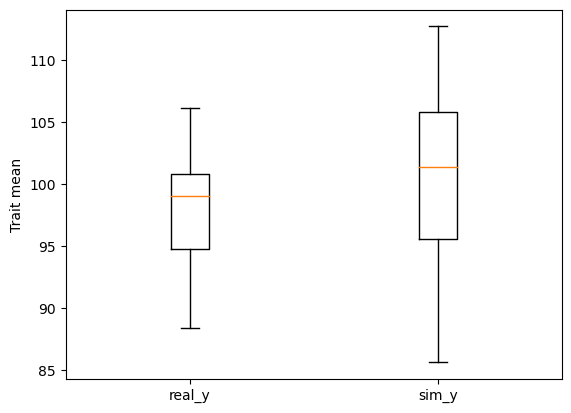

In [52]:
plt.boxplot([real_y, sim_y], labels=['real_y', 'sim_y'])

# Add labels and title
plt.xlabel('')
plt.ylabel('Trait mean')

# Show the plot
plt.show()

In [22]:
model.layers